# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [15]:
#Type your code here

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
import seaborn as sns


# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Gunakan dataset hasil clustering yang memiliki fitur Target
# Silakan gunakan dataset data_clustering jika tidak menerapkan Interpretasi Hasil Clustering [Advanced]
# Silakan gunakan dataset data_clustering_inverse jika menerapkan Interpretasi Hasil Clustering [Advanced]
# Lengkapi kode berikut
# ___ = pd_read_csv("___.csv")

df = pd.read_csv("data_clustering_inverse.csv")

In [3]:
# Tampilkan 5 baris pertama dengan function head.

df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,AgeGroup_encoded,AmountGroup_encoded,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,1,1,1
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,1,2,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2,2,0
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2,2,1
4,92.15,2023-04-03 17:15:01,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2024-11-04 08:06:36,2,2,0


Melihat korelasi antar fitur dan korelasi fitur dengan target

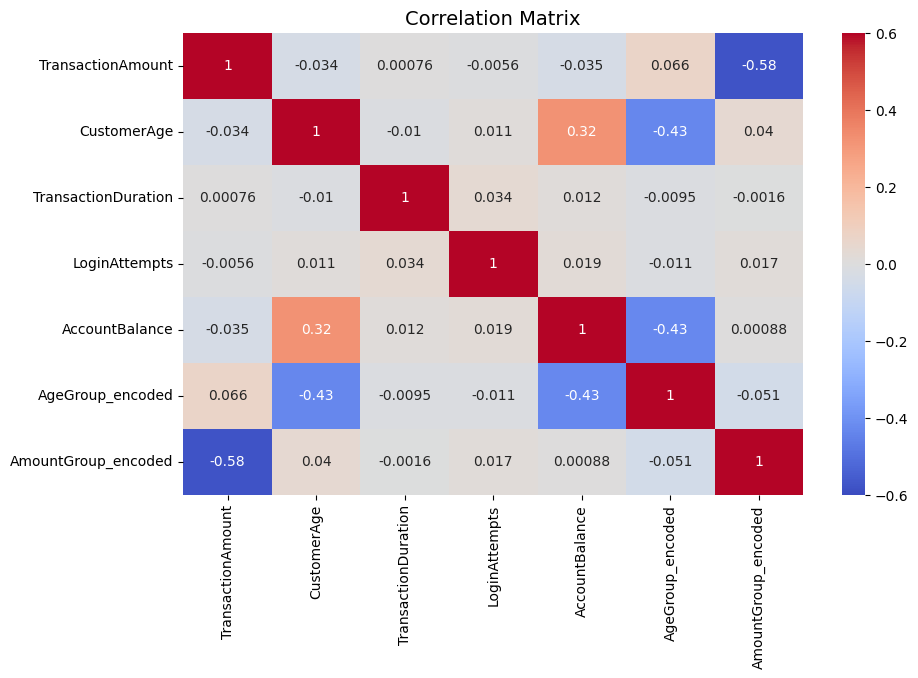

/tmp/ipykernel_6796/3900542134.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")


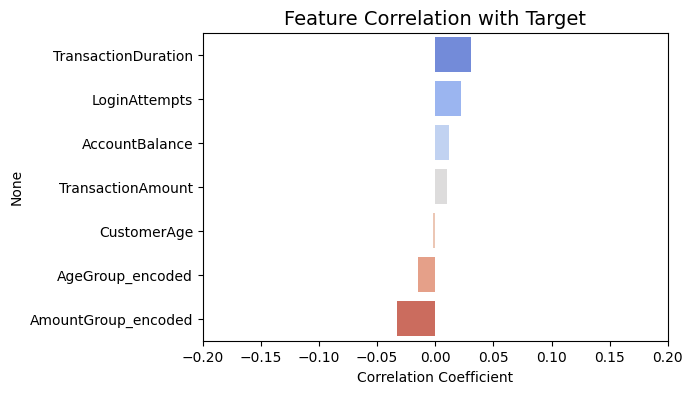

In [11]:
corr = df.corr(numeric_only=True)

# --- Heatmap korelasi antar fitur ---
plt.figure(figsize=(10,6))
sns.heatmap(
    corr.drop(columns=["Target"]).drop(index=["Target"]), 
    annot=True, cmap="coolwarm", center=0, vmin=-0.6, vmax=0.6
)
plt.title("Correlation Matrix", fontsize=14)
plt.show()

# --- Korelasi fitur dengan Target ---
corr_target = corr["Target"].drop("Target").sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=corr_target.values, y=corr_target.index, palette="coolwarm")
plt.title("Feature Correlation with Target", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.xlim(-0.2, 0.2)
plt.show()


In [12]:
# Drop fitur yang tidak diperlukan
df = df.drop(columns=["TransactionDate", "PreviousTransactionDate"])

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [ ]:
# Menggunakan train_test_split() untuk melakukan pembagian dataset.

X = df.drop('Target', axis=1)
y = df['Target']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.preprocessing import LabelEncoder

cat_cols = X_train.select_dtypes(include=['object']).columns


le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    # Fit on train, transform both train and test
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
    le_dict[col] = le  



In [23]:
X

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,AgeGroup_encoded,AmountGroup_encoded
0,14.09,Debit,San Diego,ATM,70.0,Doctor,81.0,1.0,5112.21,1,1
1,376.24,Debit,Houston,ATM,68.0,Doctor,141.0,1.0,13758.91,1,2
2,126.29,Debit,Mesa,Online,19.0,Student,56.0,1.0,1122.35,2,2
3,184.50,Debit,Raleigh,Online,26.0,Student,25.0,1.0,8569.06,2,2
4,92.15,Debit,Oklahoma City,ATM,18.0,Student,172.0,1.0,781.68,2,2
...,...,...,...,...,...,...,...,...,...,...,...
2343,185.97,Debit,Denver,Online,23.0,Student,19.0,1.0,1776.91,2,2
2344,243.08,Credit,Jacksonville,Online,24.0,Student,93.0,1.0,131.25,2,2
2345,12.18,Debit,New York,Branch,76.0,Retired,77.0,1.0,4909.24,1,1
2346,232.12,Debit,Omaha,ATM,37.0,Engineer,51.0,1.0,6689.87,0,2


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [37]:
# Buatlah model klasifikasi menggunakan Decision Tree
model = DecisionTreeClassifier(
    criterion="gini",  # or "entropy"
    max_depth=None,    # tune via GridSearchCV
    random_state=42
)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [56]:
# melihat metrics model 
y_pred = model.predict(X_test)

# 5. Evaluate the Model

print('Confusion MATRIX : \n')
print(confusion_matrix(y_test, y_pred), '\n')
print('Evaluation Metrics : \n')
print(classification_report(y_test, y_pred))

print("Test Accuracy:", accuracy_score(y_test, y_pred))


Confusion MATRIX : 

[[123   0   0   0]
 [  0 122   0   0]
 [  0   0 103   0]
 [  0   0   0 122]] 

Evaluation Metrics : 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       122
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       122

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

Test Accuracy: 1.0


In [39]:
# Menyimpan Model
import joblib
joblib.dump(model, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

Mencoba RandomForest

In [40]:
# Melatih model menggunakan algoritma klasifikasi scikit-learn selain Decision Tree.
# Model Random Forest 
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(
    n_estimators=100,
    criterion="gini",
    max_depth=None,
    random_state=42
)
model1.fit(X_train, y_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
from sklearn.neural_network import MLPClassifier

model2 = MLPClassifier(
    hidden_layer_sizes=(100,50),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)
model2.fit(X_train, y_train)


,hidden_layer_sizes,"(100, ...)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,500
,shuffle,True
,random_state,42


In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

y_pred1 = model1.predict(X_test)

print('Confusion Matrix Random Forest :\n')
print(confusion_matrix(y_test, y_pred1), '\n')
print('Evaluation Metrics :\n')
print(classification_report(y_test, y_pred1))

print("Test Accuracy:", accuracy_score(y_test, y_pred1))

Confusion Matrix Random Forest :

[[123   0   0   0]
 [  0 122   0   0]
 [  0   0 103   0]
 [  0   0   0 122]] 

Evaluation Metrics :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       122
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       122

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470

Test Accuracy: 1.0


In [45]:
joblib.dump(model1, 'explore_Random_Forest_classification.h5')


['explore_Random_Forest_classification.h5']

In [ ]:
y_pred2 = model2.predict(X_test)

print('Confusion Matrix MLP Classifier :\n')
print(confusion_matrix(y_test, y_pred2), '\n')
print('Evaluation Metrics :\n')
print(classification_report(y_test, y_pred2))





Confusion Matrix MLP Classifier :

[[  0 122   0   1]
 [  0 122   0   0]
 [  0  95   7   1]
 [  1 117   2   2]] 

Evaluation Metrics :

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       123
           1       0.27      1.00      0.42       122
           2       0.78      0.07      0.12       103
           3       0.50      0.02      0.03       122

    accuracy                           0.28       470
   macro avg       0.39      0.27      0.14       470
weighted avg       0.37      0.28      0.15       470

Test Accuracy: 0.27872340425531916


In [49]:
joblib.dump(model2, 'explore_MLP_classifier_classification.h5')

['explore_MLP_classifier_classification.h5']

In [ ]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [ ]:
# Lakukan Hyperparameter Tuning dan Latih ulang.
# Lakukan dalam satu cell ini saja.
# Hyperparameter Tuning untuk model Neural Network MLP

from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(max_iter=500, random_state=42)

# Grid hyperparameter
param_grid = {
    "hidden_layer_sizes": [(50,), (100,), (100,50), (128,64,32)],  
    "activation": ["relu", "tanh", "logistic"],                    
    "solver": ["adam", "sgd"],                                     
    "alpha": [0.0001, 0.001, 0.01],                                
    "learning_rate": ["constant", "adaptive"],                     
}

# GridSearch with cross-validation
grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    cv=3,                      
    scoring="accuracy",
    n_jobs=-1,             
    verbose=2
)

grid_search.fit(X_train, y_train)

# Best parameter and cross validation
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=adam; total time=   0.2s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=constant, solver=sgd; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=adaptive, solver=adam; total time=   0.4s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(50,), learning_rate=constant, solver=adam; total time=   0.3s
[CV] END activation=relu, alpha=0.0001, hidden_layer_sizes=(100,), learning_rate=con

Test Accuracy: 0.8063829787234043

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       123
           1       1.00      1.00      1.00       122
           2       1.00      1.00      1.00       103
           3       1.00      1.00      1.00       122

    accuracy                           1.00       470
   macro avg       1.00      1.00      1.00       470
weighted avg       1.00      1.00      1.00       470



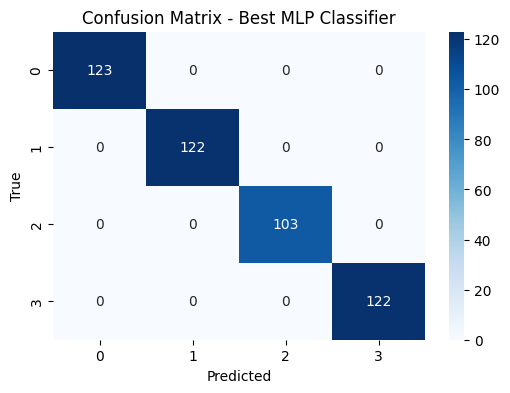

In [58]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

best_mlp = grid_search.best_estimator_

test_score = best_mlp.score(X_test, y_test)
print("Test Accuracy:", test_score)

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=best_mlp.classes_,
            yticklabels=best_mlp.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Best MLP Classifier")
plt.show()



In [57]:
# Menyimpan Model hasil tuning
# import joblib
joblib.dump(best_mlp, 'tuning_classification.h5')

['tuning_classification.h5']

End of Code